In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('/content/hospital_readmissions.csv')

In [3]:
df.head()

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


In [4]:
#checking the shape of the dataset
df.shape

(30000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


# Data Pre-Processing and Cleaning

In [6]:
#descriptive statistics
df.describe()

,patient_id,age,cholesterol,bmi,medication_count,length_of_stay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,53.884233,225.260400,28.946263,5.012267,5.502900
std,8660.398374,21.056485,43.585671,6.348204,3.166383,2.867298
min,1.000000,18.000000,150.000000,18.000000,0.000000,1.000000
25%,7500.750000,36.000000,188.000000,23.400000,2.000000,3.000000
50%,15000.500000,54.000000,225.000000,28.900000,5.000000,5.000000
75%,22500.250000,72.000000,263.000000,34.500000,8.000000,8.000000
max,30000.000000,90.000000,300.000000,40.000000,10.000000,10.000000


In [7]:
#descriptive statisitcs for categorical variables
df.describe(include ='object').T

,count,unique,top,freq
gender,30000,3,Male,10097
blood_pressure,30000,1581,143/94,41
diabetes,30000,2,No,15051
hypertension,30000,2,No,15022
discharge_destination,30000,3,Home,20877
readmitted_30_days,30000,2,No,26326


In [8]:
#checking for null values
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
blood_pressure,0
cholesterol,0
bmi,0
diabetes,0
hypertension,0
medication_count,0
length_of_stay,0


In [9]:
#checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [10]:
#removing patient id column
df = df.drop('patient_id', axis=1)

In [11]:
#splitting the blood pressure value into systolic and diastolic as together it cannot  considered as numerical
df[['systolic','diastolic']] = df['blood_pressure'].str.split('/' ,expand= True).astype(int)


In [12]:
df.head()

,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,systolic,diastolic
0,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes,130,72
1,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No,120,92
2,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No,135,78
3,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No,123,80
4,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No,135,84


In [13]:
# dropping the blood pressure variable
df = df.drop('blood_pressure', axis=1)

# Exploratory Data Analysis

In exploratory data analysis , i will explore the distribution of categorical and numerical variables, the relation between the target variable and independent variables and finally the correlation .

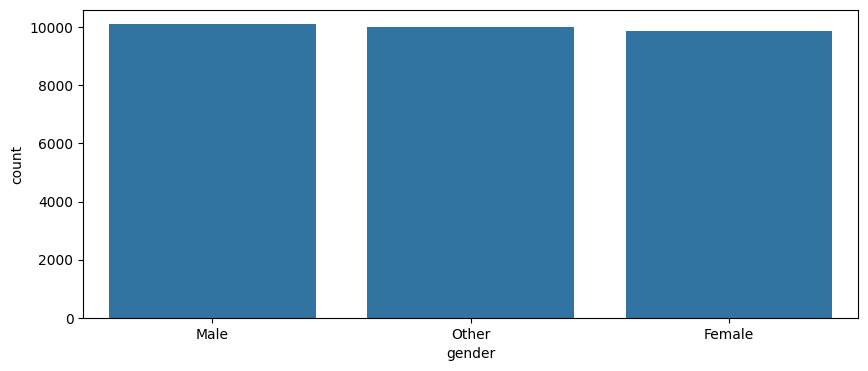

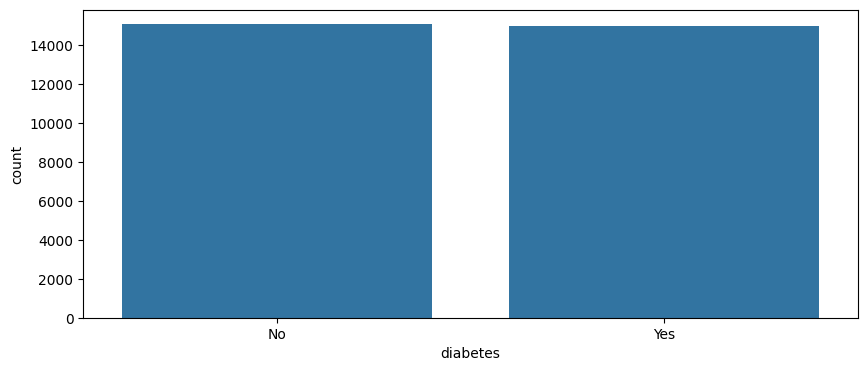

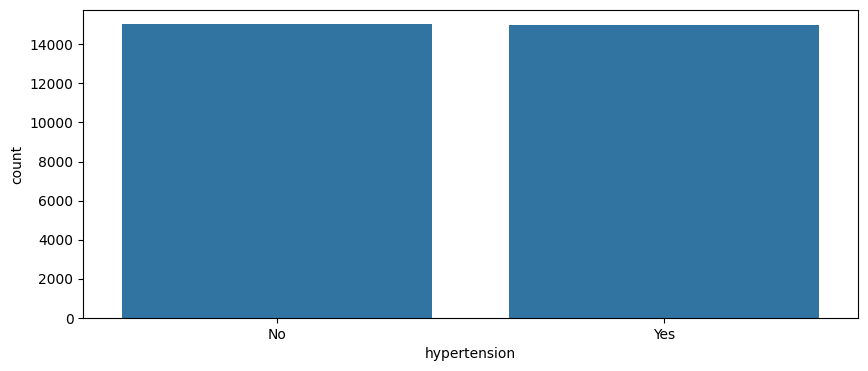

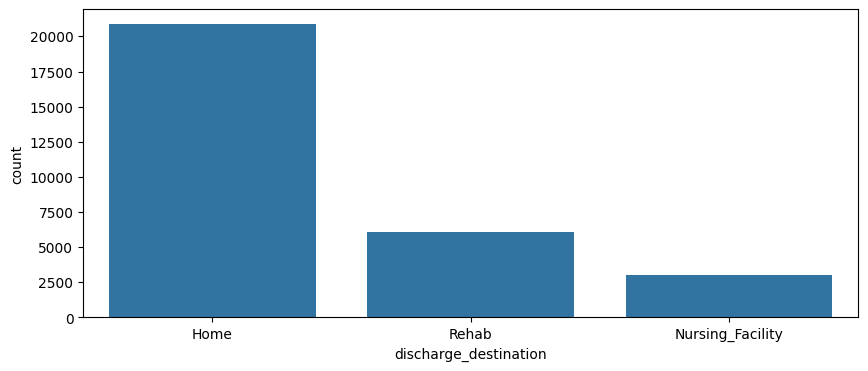

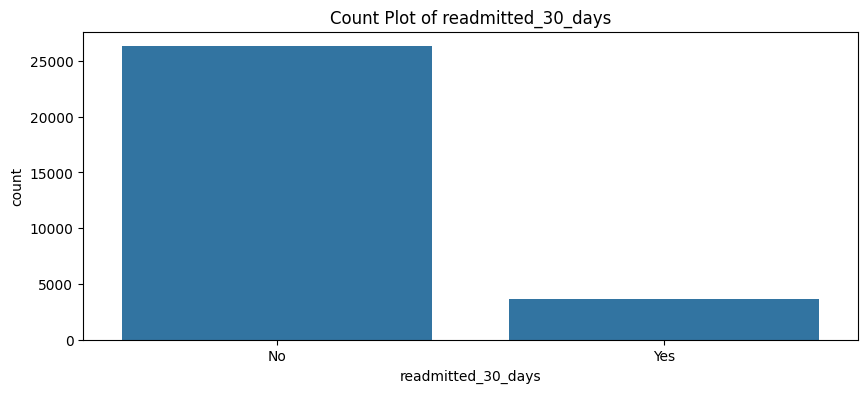

In [14]:
#Distribution of categorical variables
cat_cols = ['gender','diabetes','hypertension','discharge_destination', 'readmitted_30_days']
for col in cat_cols:
 plt.figure(figsize=(10,4))
 sns.countplot( x=col, data=df, order=df[col].value_counts().index)
plt.title(f"Count Plot of {col}")
plt.show()

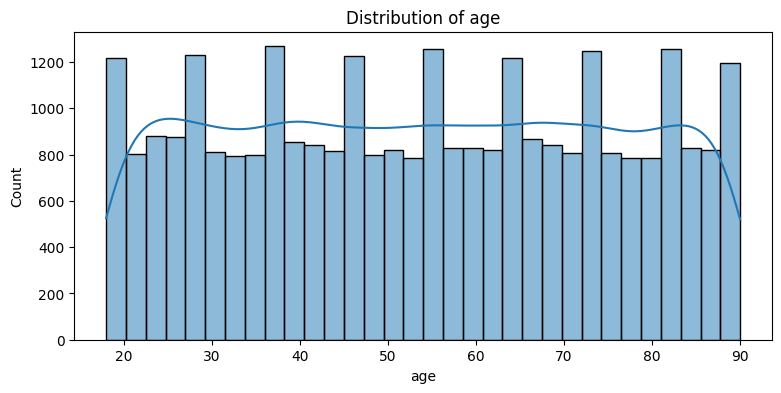

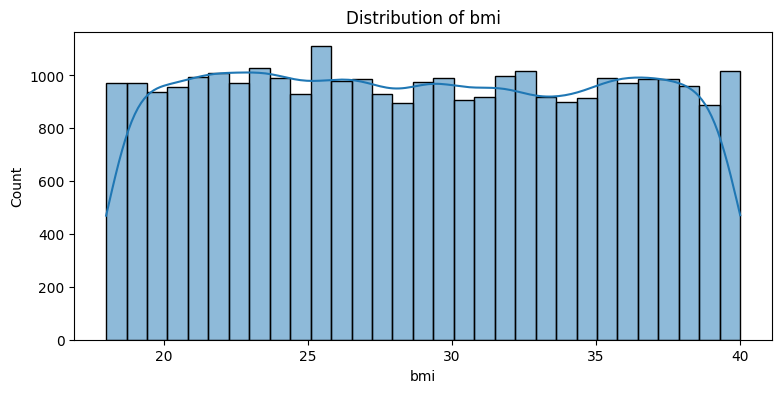

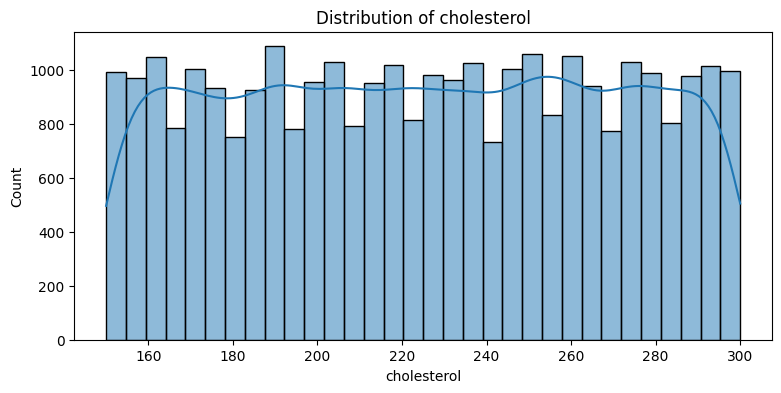

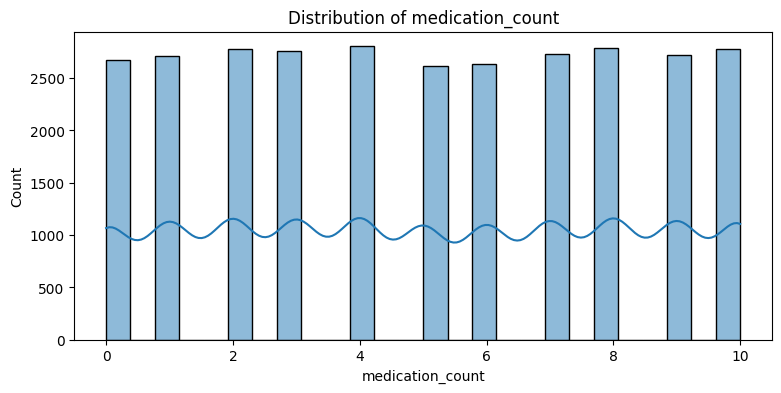

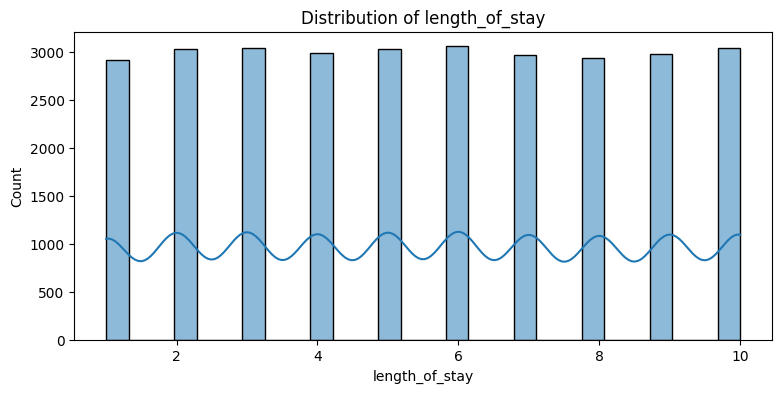

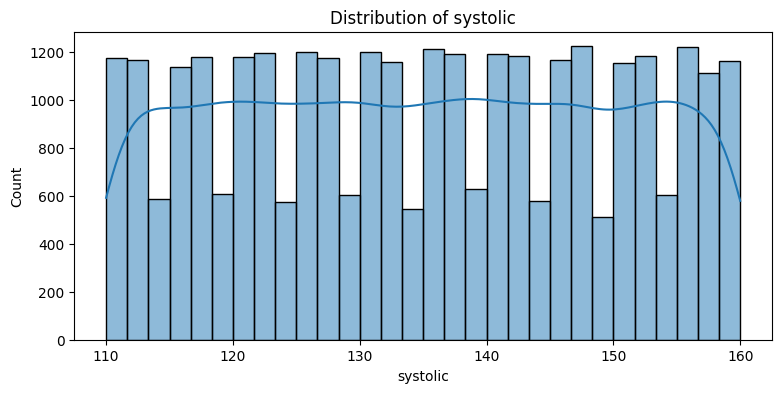

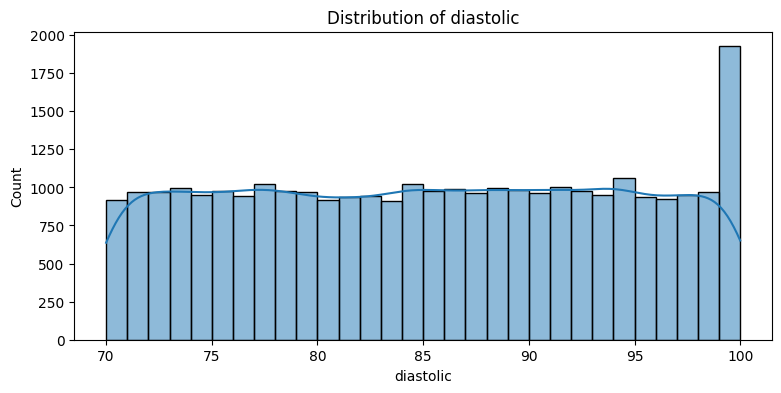

In [15]:
#Distribution of numerical variables
num_cols = ['age','bmi','cholesterol','medication_count','length_of_stay','systolic','diastolic']
for col in num_cols :
  plt.figure(figsize=(9,4))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()


## Bivariate analysis

Age vs readmission days

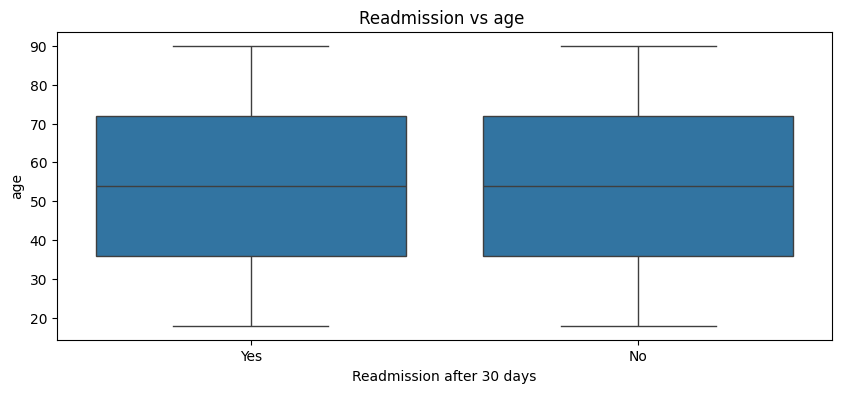

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df, x='readmitted_30_days', y='age' )
plt.title('Readmission vs age ')
plt.xlabel('Readmission after 30 days')
plt.ylabel('age')
plt.show()


Age is evenly distributed for readmission of the patients , so age does not have an impact in the readmission. From the boxplot , most of the patients with or without readmission are in the average range of 55 -60.

Gender vs Readmission after 30 days


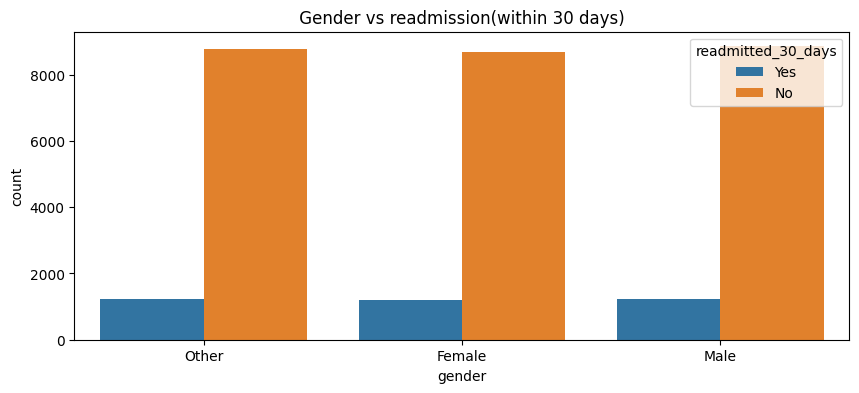

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(data= df, x='gender', hue='readmitted_30_days')
plt.title(' Gender vs readmission(within 30 days) ')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()


From the above graph , there no difference in the gender distribution for readmission status.Hence gender does not have significant role in the readmission of the patients .

Readmission vs Destination

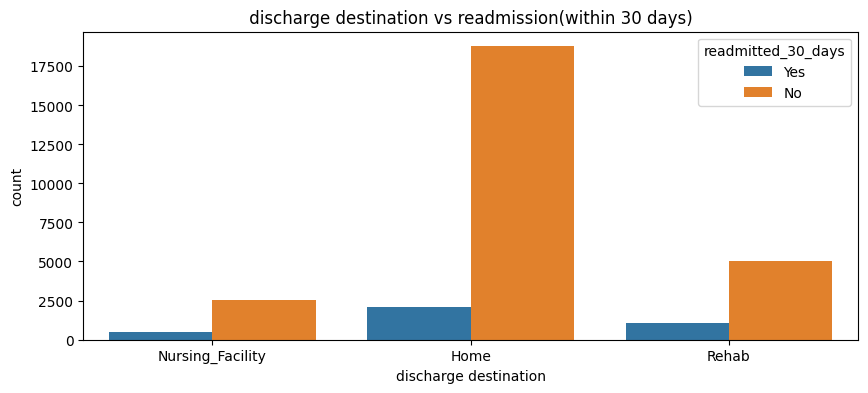

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data= df, x='discharge_destination', hue='readmitted_30_days')
plt.title(' discharge destination vs readmission(within 30 days) ')
plt.xlabel('discharge destination')
plt.ylabel('count')
plt.show()

Patients whose discharge destination is home are likely to get readmitted to hospital after 30 days as compared to other two discharge destination such as Nursing facility and rehab.This is probably due to the less care facilities received at home .

Readmission vs bmi

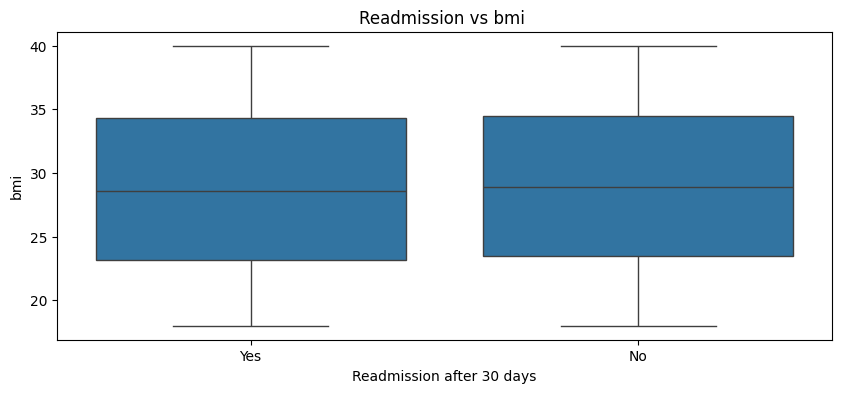

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df, x='readmitted_30_days', y='bmi' )
plt.title('Readmission vs bmi ')
plt.xlabel('Readmission after 30 days')
plt.ylabel('bmi')
plt.show()

Readmission vs Cholestrol

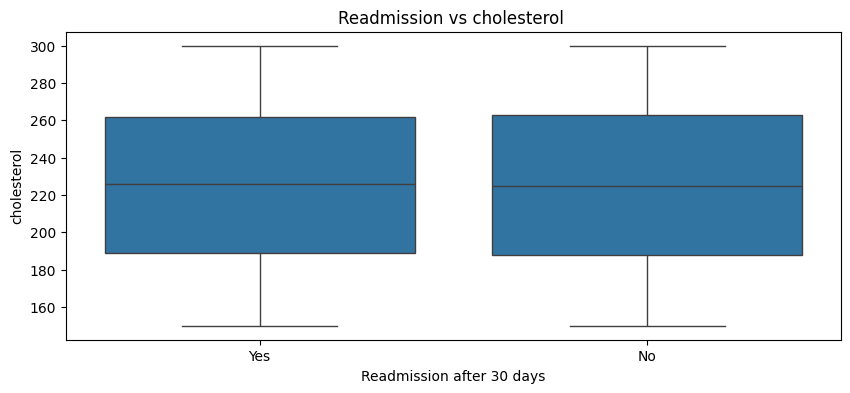

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df, x='readmitted_30_days', y='cholesterol' )
plt.title('Readmission vs cholesterol ')
plt.xlabel('Readmission after 30 days')
plt.ylabel('cholesterol')
plt.show()

Readmission vs hypertension

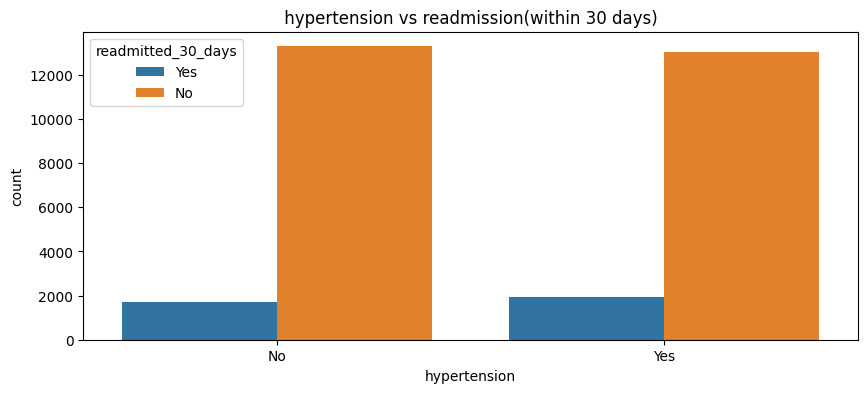

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data= df, x='hypertension', hue='readmitted_30_days')
plt.title(' hypertension vs readmission(within 30 days) ')
plt.xlabel('hypertension')
plt.ylabel('count')
plt.show()

Readmission vs Diabetes

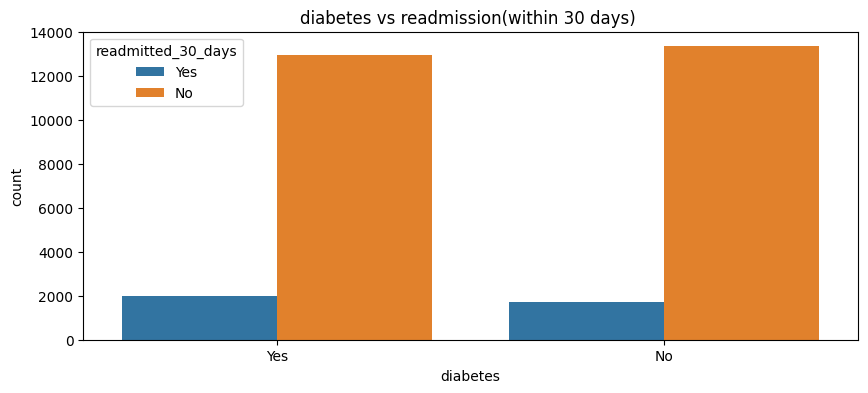

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data= df, x='diabetes', hue='readmitted_30_days')
plt.title('diabetes vs readmission(within 30 days) ')
plt.xlabel('diabetes')
plt.ylabel('count')
plt.show()

From the above graph , we can see that  patients with diabetes are likely to get readmitted after 30 days .The distribution is slightly higher compared to patients without diabetes getting readmitted.

Readmission vs medication count

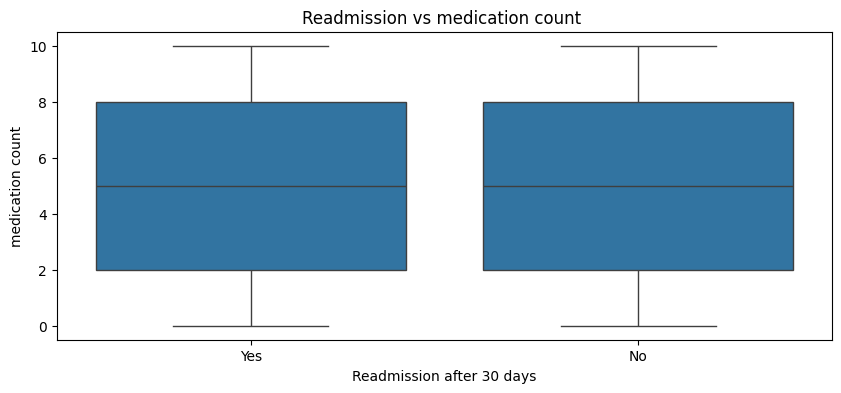

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df, x='readmitted_30_days', y='medication_count' )
plt.title('Readmission vs medication count ')
plt.xlabel('Readmission after 30 days')
plt.ylabel('medication count')
plt.show()

Readmission vs Length of stay

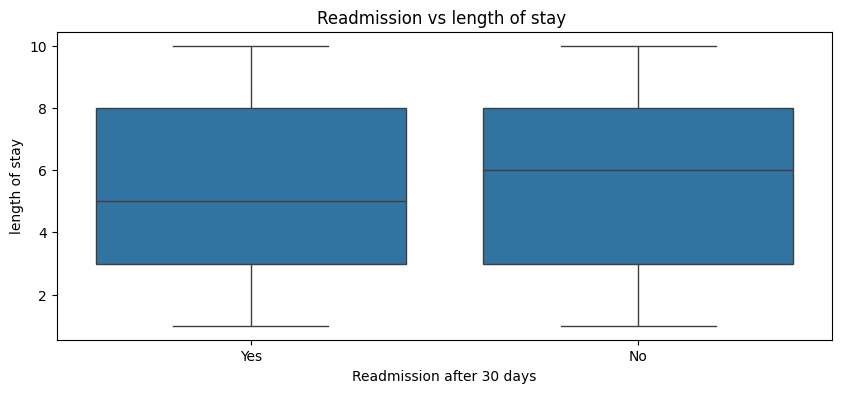

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df, x='readmitted_30_days', y='length_of_stay' )
plt.title('Readmission vs length of stay ')
plt.xlabel('Readmission after 30 days')
plt.ylabel('length of stay')
plt.show()

In [25]:
#mapping the yes/no categorical values into numeric

df['diabetes'] = df['diabetes'].map({'Yes': 1, 'No':0})
df['hypertension'] = df['hypertension'].map({'Yes': 1, 'No':0})
df['readmitted_30_days'] = df['readmitted_30_days'].map({'Yes': 1, 'No':0})

In [26]:
#Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

cat_cols = ['gender','discharge_destination']
for col in cat_cols :
   df[col] = LabelEncoder().fit_transform(df[col])


## Correlation Matrix

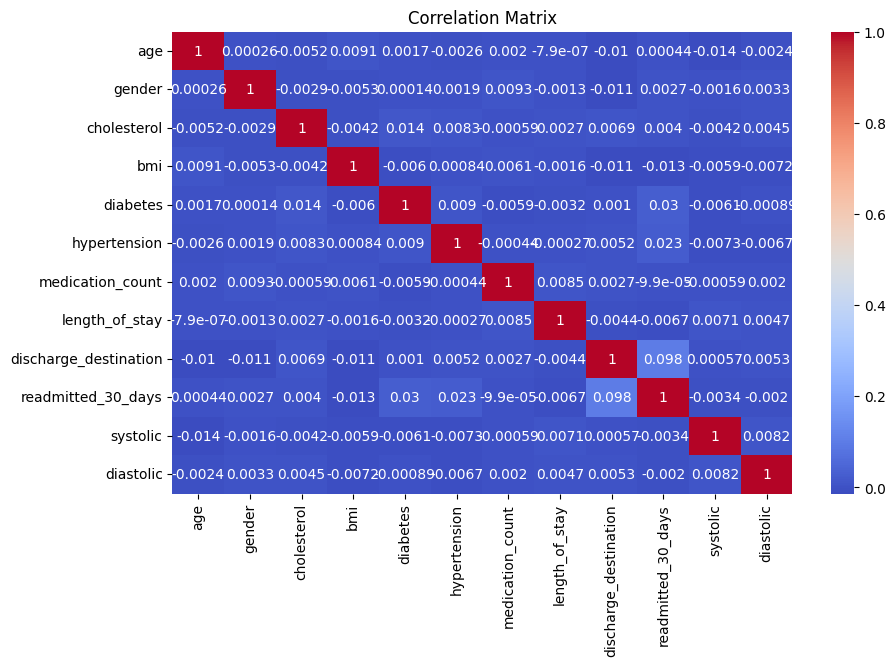

In [27]:
#Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation plot does not raises any significant relation between the variables .

# Modelling

For modelling the prediction of readmission of readmission of the patients, multiple models are used to predict and comparison of the model perfomance is plotted.


🔍 Evaluating Logistic Regression
Accuracy: 0.6743
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      5231
           1       0.18      0.44      0.26       769

    accuracy                           0.67      6000
   macro avg       0.54      0.57      0.52      6000
weighted avg       0.80      0.67      0.72      6000


🔍 Evaluating Decision Tree
Accuracy: 0.7898
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5231
           1       0.16      0.14      0.15       769

    accuracy                           0.79      6000
   macro avg       0.52      0.51      0.51      6000
weighted avg       0.78      0.79      0.79      6000


🔍 Evaluating SVM
Accuracy: 0.8718
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5231
           1       0.00      0.00      0.00       769

    accuracy                           0.87      60

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔍 Evaluating KNN
Accuracy: 0.8612
              precision    recall  f1-score   support

           0       0.87      0.98      0.93      5231
           1       0.17      0.02      0.04       769

    accuracy                           0.86      6000
   macro avg       0.52      0.50      0.48      6000
weighted avg       0.78      0.86      0.81      6000



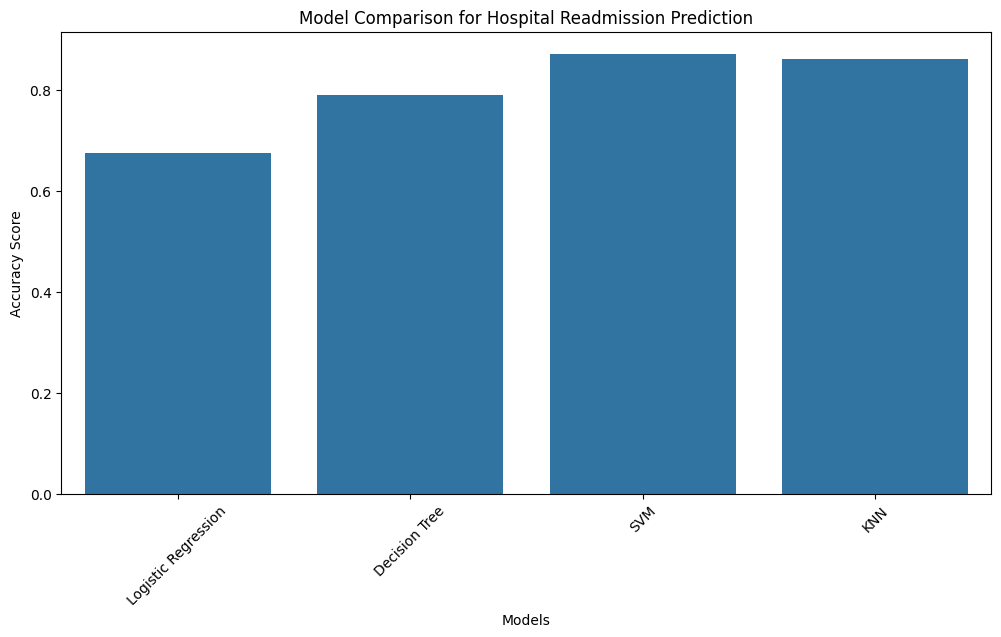

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Feature and Target variable
X = df.drop('readmitted_30_days', axis=1)
y= df['readmitted_30_days']

#Ensuring numeric columns
X = X.select_dtypes(include=[np.number])

#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Defining the models
#Adding weights to Logistic Regression and Decision tree model to correct the imbalance in the data
models = {

      "Logistic Regression": LogisticRegression(class_weight="balanced",max_iter=1000),
      "Decision Tree" : DecisionTreeClassifier(class_weight="balanced", random_state=42),
      "SVM" : SVC(),
       "KNN": KNeighborsClassifier(n_neighbors=5),
}

#Training and evaluating the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n🔍 Evaluating {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


#Visualizing the models
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison for Hospital Readmission Prediction")
plt.show()



From the model comparison , SVM and KNN has higher accuracy scores with 87% and 86% but their recall is 0 ,hence the models fails to catch the patients with readmission to the hospital.Whereas logistic regression has accuracy score 67% and the precission is 77% and recall is 44% , which means that model has managed to capture 44% of high risky patients who are readmitted after 30 days of discharge. Similarly decision tree has an accuracy of 78% and recall of 14% which is less than Logistic Regression but better than the SVM and KNN.Concluding that out of all the models , Logistic Regression was the best model in predicting the readmission of the patients after 30 days of discharge.